In [1]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner

# This file isn't a complete template, but rather gives an outline of what you need the function to do.
# If you're feeling ambitious, you can keep these functions in a separate file and import them.
# Look up how to do so for yourself, or experiment based on what you see in library imports


def differential_rl(v, r, l, i):
    """
    Calculates the change in current over time from the formula
    L(dI/dt) = V - RI
    :param v: Float for voltage
    :param r:
    :param l:
    :param i:
    :return:
    """

    dldt = (v - r*i)/l
    return dldt


    # complete the docstring
    # do some maths to calculate the difference
    # return the difference



def exact_solution_rl(v, r, l, t):
    """
    Calculates the change in current over time from the formula
    I = (V/R)(1-exp(-Rt/L))
    :param v: Float for voltage
    :param r:
    :param l:
    :param t:
    :return:
    """

    I_exact = (v/r)(1-np.exp(-r*t/L))
    return I_exact
    
    # complete the docstring
    # do some maths to calculate the exact solution at a given time
    # return the difference

def main():
    """
    Main function to solve the nonlinear ODE for varying values of a and b, and plot the results.
    """

    # define the initial conditions
    I0 = np.array([0])  # initial state at t = 0
    t0 = 0  # initial time
    tf = 20  # final time
    n = 101  # number of points

    # create a numpy array of n times linearly spaced between t0 and tf
    t = np.linspace(t0, tf, n)


    # Create a figure for the plot
    plt.figure()

    # Loop through each (a, b) pair

        # Call the RK integrator and return the solution
    result = integrate.solve_ivp(fun=nonlinear1,  # function for derivative
                                 t_span=(t0, tf),  # initial and final times
                                 I0=I0,  # initial state
                                 args=(a, b),  # pass the parameters a and b
                                 method="RK45",  # integration method
                                 t_eval=t)  # time points for result

        # Read the solution
        y = result.y[0]

        # Plot the solution for this pair of a, b
        plt.plot(t, y, label=f'a={a}, b={b}')

    # Add labels, title, and legend
    plt.xlabel('Time (t)')
    plt.ylabel('y(t)')
    plt.title('Solution of Nonlinear ODE for Varying a and b')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


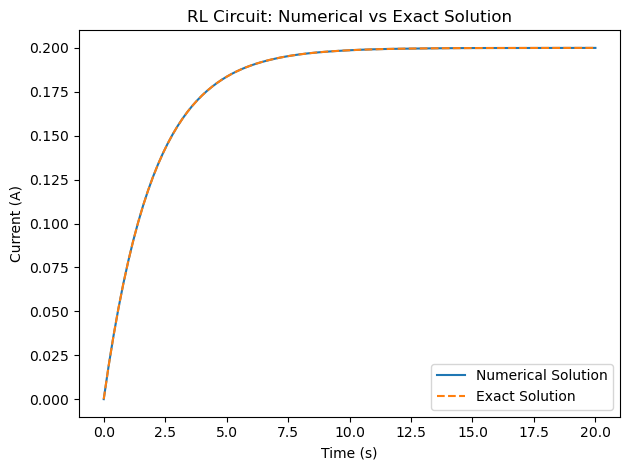

In [7]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner
# further modified for RL circuit analysis by [Your Name]

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the differential equation for the RL circuit
def differential_rl(t, I, V, R, L):
    """
    Calculates the derivative of current I over time for an RL circuit:
    L(dI/dt) = V - RI
    :param t: Float for time
    :param I: Float for current at time t
    :param V: Float for voltage
    :param R: Float for resistance
    :param L: Float for inductance
    :return: Float value for dI/dt
    """
    dIdt = (V - R*I) / L
    return dIdt

# Exact solution of the RL circuit differential equation
def exact_solution_rl(V, R, L, t):
    """
    Calculates the exact current over time for an RL circuit:
    I(t) = (V/R) * (1 - exp(-R*t/L))
    :param V: Float for voltage
    :param R: Float for resistance
    :param L: Float for inductance
    :param t: Float for time
    :return: Float value for current I at time t
    """
    I_exact = (V/R) * (1 - np.exp(-R*t/L))
    return I_exact

def main():
    """
    Main function to numerically solve and compare with the exact solution for the RL circuit ODE.
    """

    # Define the physical parameters for the RL circuit
    V = 10  # Voltage in volts
    R = 50  # Resistance in ohms
    L = 100  # Inductance in henrys
    I0 = 0  # Initial current in amperes

    # Define the time range for the solution
    t0 = 0  # initial time
    tf = 20  # final time (try different ranges to observe behavior)
    n = 101  # number of time steps
    t_values = np.linspace(t0, tf, n)

    # Solve the differential equation numerically using solve_ivp
    result = integrate.solve_ivp(fun=differential_rl,  # function for the ODE
                                 t_span=(t0, tf),  # time range
                                 y0=[I0],  # initial current
                                 args=(V, R, L),  # pass V, R, L as additional arguments
                                 t_eval=t_values,  # evaluation times
                                 method='RK45')  # use Runge-Kutta method

    # Get the numerical solution for current I
    I_numerical = result.y[0]

    # Calculate the exact solution for current I
    I_exact = exact_solution_rl(V, R, L, t_values)

    # Plot both numerical and exact solutions
    plt.plot(t_values, I_numerical, '-', label="Numerical Solution")
    plt.plot(t_values, I_exact, '--', label="Exact Solution")
    plt.xlabel('Time (s)')
    plt.ylabel('Current (A)')
    plt.title('RL Circuit: Numerical vs Exact Solution')
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()
